# CONTOUR PLOTS: NO FILL
- can specify plotting elements like:
  - how many contour lines, or define the specific levels 
  - color of contour lines
  - contour labels (and size of them!)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.colors as mcolors

In [3]:
ds = xr.open_dataset('air.mon.mean_levs.nc')
print(ds)

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
http://xarray.pydata.org/en/stable/user-guide/io.html 
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html

Text(0, 0.5, 'Latitude')

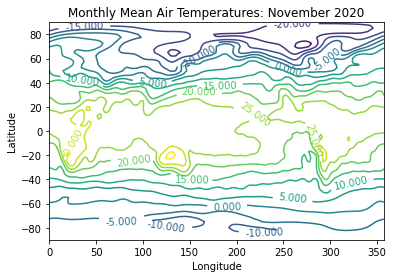

In [3]:
temp = ds['air'] # (time,level,lat,lon), with levels beginning at p = 1000 mb 
lon = ds['lon']
lat = ds['lat'] 

X, Y = np.meshgrid(lon, lat)

fig, ax = plt.subplots()
                                # Contour levels
cs=ax.contour(X,Y,temp[-1,0,:,:],levels=np.arange(-30,40,5))
ax.clabel(cs, inline=1, fontsize=10) # Contour line labels!

ax.set_title('Monthly Mean Air Temperatures: November 2020')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# CONTOUR PLOTS: FILLED
- can specify plotting elements like:
  - colormap used for colors of filled contours
  - how many contour lines, or define the specific levels 

Text(0, 0.5, 'Latitude')

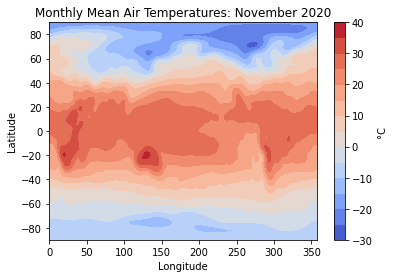

In [4]:
# Many,many colormaps to choose from in Matplotlib!
cmap=plt.get_cmap('coolwarm')

fig, ax = plt.subplots()
                                # set colormap  # no. of contour levs  
cs=ax.contourf(X,Y,temp[-1,0,:,:],cmap=cmap,levels = 13,
                      norm = mcolors.TwoSlopeNorm(0)) # center colormap on 0
cb=fig.colorbar(cs)
cb.set_label("\u00b0C")

ax.set_title('Monthly Mean Air Temperatures: November 2020')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')